In [10]:
# Imports that we'll need
import numpy as np
import matplotlib.pyplot as plt
from stablab import (semicirc2, winding_number, Evans_plot, 
                     emcset, Evans_compute, Struct, reflect_image)
from stablab.root_finding import root_solver1

In [11]:
from Boussinesq import A, Ak

In [12]:
# making p a Struct means that we can use dictionary access
# ( p['S'] ) or attribute access ( p.S ) to access its
# attributes
p = Struct({'S':0.4})

In [13]:
# profile
s = Struct()
s.I = 8
s.R = s.I
s.L = -s.I
s.A = A
s.Ak = Ak

In [14]:
# set STABLAB Structs to local default values
# choose whichever one you want to try by uncommenting it

#s,e,m,c = emcset(s,'front',[2,2],'reg_reg_polar')
#s,e,m,c = emcset(s,'front',[2,2],'reg_adj_polar')
#s,e,m,c = emcset(s,'front',[2,2],'adj_reg_polar')
s,e,m,c = emcset(s,'front',[2,2],'reg_adj_compound')

In [15]:
# Create the Preimage
points = 50
preimage = 0.16+0.05*np.exp(2*np.pi*1j*np.linspace(0,0.5,
    points+(points-1)*c.ksteps))

In [16]:
# Compute the Evans function
halfw,image = Evans_compute(preimage,c,s,p,m,e)

In [18]:
# Reflect w about the imaginary access
w = reflect_image(halfw)

# Normalize the Evans Output
w = w/w[0]

Winding Number: 1.000000



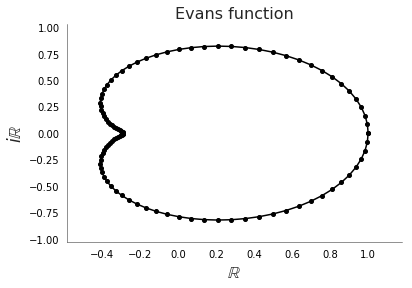

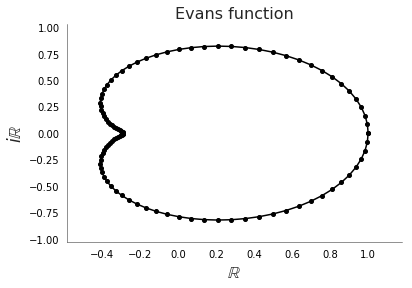

In [20]:
# Process and display data:
wnd = winding_number(w)
print("Winding Number: {:f}\n".format(wnd))
Evans_plot(w)

In [21]:
#Set variables in preparation for root solving
c.lambda_steps = 0
c.stats = 'off'
c.pic_stats = 'on'
c.ksteps = 2**8
c.moments = 'off'
c.tol = 0.2
c.root_fun = Evans_compute

In [ ]:
%config InlineBackend.close_figures=False # keep figures open in pyplot

# Since the winding number was 1, we solve for the root by looking
# in the box
# This part is pretty slow (expected)
box = [0.1,-0.1,0.25,0.05]
tol = 1e-3
roots = root_solver1(box,tol,p,s,e,m,c)
print(roots)